<a href="https://colab.research.google.com/github/dbello612/Taller-3/blob/main/Taller3JuanitaRojas%26DianaBello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Universidad Externado de Colombia
##Finanzas Computacionales

##Taller 3
##Diana Bello y Juanita Rojas

In [ ]:
%pip install --quiet yfinance
import yfinance as yf
import numpy as np
import pandas as pd
from scipy import stats
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import cvxpy as cp
import warnings
warnings.filterwarnings("ignore")

1. Escoja 5 acciones que hagan parte del índice Dow Jones (DJI). Con la información
histórica de estas acciones para un periodo de al menos 5 años con periodicidad mensual y
con cierre a Dic-2022:

a. Estimar los parámetros del modelo de mercado de las cinco acciones y construir un  DataFrame donde se resuman los caculos de: retornos esperados (promedio), volatilidades,  betas, retornos estimados (CAPM) y el coeficiente de determinación de cada uno

b. Construya un plano riesgo-retorno en el que se relacionen los retornos estimados del  CAPM y las betas de los activos.  

c. Punto opcional: estime los retornos de los cinco activos usando el modelo de Fama French. Compare los resultados con el modelo CAPM. 

In [ ]:
act_cat = ["CAT"]
act_aapl = ["AAPL"]
act_axp = ["AXP"]
act_jnj = ["JNJ"]
act_gs = ["GS"]

In [ ]:
preciosCAT = yf.download(act_cat, start ="2017-12-01", end="2022-12-31", interval="1mo")["Adj Close"]
retornosCAT = np.log(preciosCAT/preciosCAT.shift()).dropna()
preciosAAPL = yf.download(act_aapl, start ="2017-12-01", end="2022-12-31", interval="1mo")["Adj Close"]
retornosAAPL = np.log(preciosAAPL/preciosAAPL.shift()).dropna()
preciosAXP = yf.download(act_axp, start ="2017-12-01", end="2022-12-31", interval="1mo")["Adj Close"]
retornosAXP = np.log(preciosAXP/preciosAXP.shift()).dropna()
preciosJNJ = yf.download(act_jnj, start ="2017-12-01", end="2022-12-31", interval="1mo")["Adj Close"]
retornosJNJ = np.log(preciosJNJ/preciosJNJ.shift()).dropna()
preciosGS = yf.download(act_gs, start ="2017-12-01", end="2022-12-31", interval="1mo")["Adj Close"]
retornosGS = np.log(preciosGS/preciosGS.shift()).dropna()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
p_indice=yf.download("^DJI",start="2017-12-01",end="2022-12-31",interval="1Mo")["Adj Close"]
r_indice=np.log(p_indice/p_indice.shift()).dropna()

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Retornos esperados
ret_espCAT = pd.DataFrame([np.mean(retornosCAT)])
ret_espAAPL = pd.DataFrame([np.mean(retornosAAPL)])
ret_espAXP = pd.DataFrame([np.mean(retornosAXP)])
ret_espJNJ = pd.DataFrame([np.mean(retornosJNJ)])
ret_espGS = pd.DataFrame([np.mean(retornosGS)])


In [ ]:
# Volatilidad
sigmaCAT=np.std(retornosCAT)
sigmaAAPL=np.std(retornosAAPL)
sigmaAXP=np.std(retornosAXP)
sigmaJNJ=np.std(retornosJNJ)
sigmaGS=np.std(retornosGS)

In [ ]:
#constantes
cat = retornosCAT
aapl = retornosAAPL
axp = retornosAXP
jnj = retornosJNJ
gs = retornosGS
x = r_indice

In [ ]:
capmCAT = sm.OLS(cat, sm.add_constant(x)).fit()
print(capmCAT.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     57.11
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           3.39e-10
Time:                        04:38:00   Log-Likelihood:                 80.284
No. Observations:                  60   AIC:                            -156.6
Df Residuals:                      58   BIC:                            -152.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0032      0.008      0.388      0.6

In [ ]:
capmAAPL = sm.OLS(aapl, sm.add_constant(x)).fit()
print(capmAAPL.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     38.48
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           6.29e-08
Time:                        04:38:00   Log-Likelihood:                 73.718
No. Observations:                  60   AIC:                            -143.4
Df Residuals:                      58   BIC:                            -139.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0142      0.009      1.524      0.1

In [ ]:
capmAXP = sm.OLS(axp, sm.add_constant(x)).fit()
print(capmAXP.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     97.35
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           5.10e-14
Time:                        04:38:00   Log-Likelihood:                 93.346
No. Observations:                  60   AIC:                            -182.7
Df Residuals:                      58   BIC:                            -178.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.007      0.256      0.7

In [ ]:
capmJNJ = sm.OLS(jnj, sm.add_constant(x)).fit()
print(capmJNJ.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     37.02
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           9.89e-08
Time:                        04:38:00   Log-Likelihood:                 108.52
No. Observations:                  60   AIC:                            -213.0
Df Residuals:                      58   BIC:                            -208.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0032      0.005      0.612      0.5

In [ ]:
capmGS = sm.OLS(gs, sm.add_constant(x)).fit()
print(capmGS.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     127.3
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           2.95e-16
Time:                        04:38:00   Log-Likelihood:                 93.013
No. Observations:                  60   AIC:                            -182.0
Df Residuals:                      58   BIC:                            -177.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.007     -0.049      0.9

In [ ]:
betaCAT = capmCAT.params[1]
rf = 0
ret_esp_capmCAT = ret_espCAT + betaCAT * (r_indice.mean() - rf)
rcCAT = capmCAT.rsquared

In [ ]:
betaAAPL = capmAAPL.params[1]
rf = 0
ret_esp_capmAAPL = ret_espAAPL + betaAAPL * (r_indice.mean() - rf)
rcAAPL = capmAAPL.rsquared

In [ ]:
betaAXP = capmAXP.params[1]
rf = 0
ret_esp_capmAXP = ret_espAXP + betaAXP * (r_indice.mean() - rf)
rcAXP = capmAXP.rsquared

In [ ]:
betaJNJ = capmJNJ.params[1]
rf = 0
ret_esp_capmJNJ = ret_espJNJ + betaJNJ * (r_indice.mean() - rf)
rcJNJ = capmJNJ.rsquared

In [ ]:
betaGS = capmGS.params[1]
rf = 0
ret_esp_capmGS = ret_espGS + betaGS * (r_indice.mean() - rf)
rcGS = capmGS.rsquared

In [ ]:
ret_esperado = pd.DataFrame({"ret_esp" : [ret_espCAT, ret_espAAPL, ret_espAXP, ret_espJNJ, ret_espGS]})
sigma1 = pd.DataFrame({"sigma" : [ret_espCAT, ret_espAAPL, ret_espAXP, ret_espJNJ, ret_espGS]})

In [ ]:
results = pd.DataFrame({
    "retorno esperado" : [ret_espCAT, ret_espAAPL, ret_espAXP, ret_espJNJ, ret_espGS],
    "sigma" : [sigmaCAT, sigmaAAPL, sigmaAXP, sigmaJNJ, sigmaGS],
    'Beta': [betaCAT, betaAAPL, betaAXP, betaJNJ, betaGS],
    'Retorno estimado': [ret_esp_capmCAT,ret_esp_capmAAPL,ret_esp_capmAXP,ret_esp_capmJNJ,ret_esp_capmGS],
    'Coeficiente determinación': [rcCAT,rcAAPL,rcAXP,rcJNJ,rcGS]
})
acciones = ["CAT", "AAPL", "AXP", "JNJ", "GS"]
results.index = acciones
results.index.name = "Acciones"
results

,retorno esperado,sigma,Beta,Retorno estimado,Coeficiente determinación
Acciones,,,,,
CAT,0 0 0.009042,0.089432,1.184949,0 0 0.014836,0.496135
AAPL,0 0 0.01954,0.091343,1.085104,0 0 0.024845,0.398821
AXP,0 0 0.007808,0.083568,1.244390,0 0 0.013892,0.626645
JNJ,0 0 0.006112,0.050753,0.595905,0 0 0.009026,0.389593
GS,0 0 0.006664,0.091770,1.430769,0 0 0.01366,0.686943


##2. Escoja 5 acciones que hagan parte del índice Dow Jones (DJI). Con la información  histórica de estas acciones para un periodo de al menos 5 años con periodicidad mensual y  con cierre a Dic-2022, construya el portafolio óptimo tangente (máximo ratio de Sharpe). 

In [ ]:
activos = ["KO","INTC","DIS","IBM","V"]

In [ ]:
precios = yf.download(activos, start ="2017-12-01", end="2022-12-31", interval="1mo")["Adj Close"]
retornos = np.log(precios/precios.shift()).dropna() 

[*********************100%***********************]  5 of 5 completed


In [ ]:
ind=['^DJI']
indice= yf.download(ind, start ="2017-12-01", end="2022-12-31", interval="1mo")["Adj Close"]

[*********************100%***********************]  1 of 1 completed


a. Presentar el grafico de pesos y sus medidas de retorno esperado y volatilidad. Nota:  tomar solo posiciones largas en el portafolio. 

In [ ]:
mu = pd.DataFrame(retornos.mean()) 
cov = pd.DataFrame(retornos.cov())
sigma = pd.DataFrame(retornos.std())

In [ ]:
n = len(mu)
x = cp.Variable(n)
objetive = cp.Minimize(cp.quad_form(x,cov)) 
constraints = [x @ mu == 1, x>=0] 
prob = cp.Problem(objetive,constraints)
prob.solve()
sharpe = round(pd.DataFrame(x.value/sum(x.value)),3)
sharpe.index=activos
sharpe.columns=['Pesos']
sharpe

,Pesos
KO,0.000
INTC,0.000
DIS,0.000
IBM,0.456
V,0.544


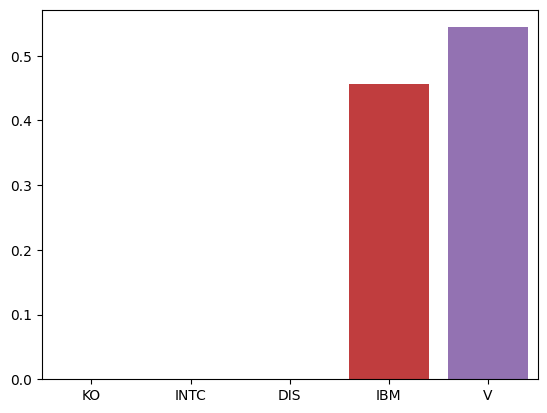

In [ ]:
sns.barplot(sharpe.T);

Para el portafolio de Sharpe sin cortos, no se deberia invertir en KO, INTC, ni en DIS. Mas del 0,45 de la inversión se le da a IBM y mas del 0,55 se le da a V.

b. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el  modelo estándar o paramétrico. 

In [ ]:
n=5
x = cp.Variable(n)
objetivo = cp.Minimize(cp.quad_form(x, cov))
restricciones = [cp.sum(x) == 1, x >= 0]
prob = cp.Problem(objetivo, restricciones)
prob.solve()
wpmvg = x.value
wpmvg

array([-7.24754550e-21,  7.96763347e-02,  2.66971811e-01,  6.53351855e-01,
       -2.73065333e-21])

In [ ]:
from scipy.stats import norm

In [ ]:
#VaR con nivel de confianza del 95%
ret=retornos@wpmvg
rp=ret.mean()
sigmap=ret.std()
alpha=0.05
VaRp=rp-norm.ppf(1-alpha)*sigmap
VaRp

-0.07755122594868613

Con un 95% de confianza, el riesgo de perdida al invertir en este portafolio es de 7.755%

In [ ]:
#VaR con nivel de confianza del 99%
alpha2=0.01
VaRp2=rp-norm.ppf(1-alpha2)*sigmap
VaRp2

-0.11121107378462841

Con un 99% de confianza, el riesgo de perdida al invertir en este portafolio es de 11,12%

c. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el  modelo de estimación histórica. 

In [ ]:
np.percentile(ret,5)

-0.06345795353688934

In [ ]:
np.percentile(ret,1)

-0.13043572997763428

d. Utilice el método de Monte Carlo para construir una muestra aleatoria de 10.000  portafolios. Con esta muestra aleatoria calcular el VaR de simulación del portafolio. e. ¿Se encuentran diferencias significativas entre el VaR de simulación y el VaR de  paramétrico? 

In [ ]:
#Montecarlo Simulación VaR
unif_dis=np.random.normal(rp,sigmap,10000)
simulacion=np.percentile(unif_dis,5)
simulacion

-0.07819839491730297

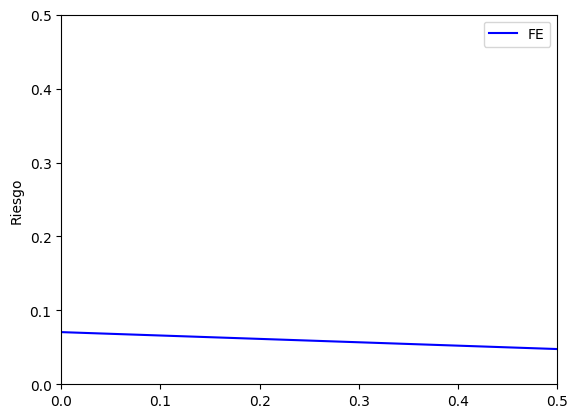

In [ ]:
#Frontera eficiente
plt.plot(unif_dis,'blue',label='FE')
plt.ylabel('Retorno Esperado')
plt.ylabel('Riesgo')
plt.xlim(0,0.5)
plt.ylim(0,0.5)
plt.legend()
plt.show();

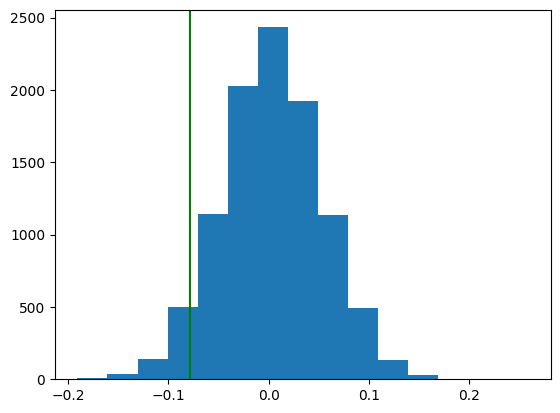

In [ ]:
plt.hist(unif_dis,bins='sturges')
plt.axvline(simulacion, color='g',label='VaR');

In [ ]:
Var5pc = np.percentile(simulacion, 5)
Var5pc

-0.07819839491730297

In [ ]:
Var1pc = np.percentile(simulacion, 1)
Var1pc
     

-0.07819839491730297

## 3. Los precios de activos riesgos en el mercado describen un proceso estocástico {St} t≥0 que satisface:

St = S0 exp{(μ– 1/2σ 2 )dt + σ dWt }

Donde: μ es la tasa de retorno del activo, σ es su volatilidad y Wt es un proceso estándar de Wiener. A partir de esta expresión es posible simular el precio del activo en algún instante de tiempo t.

a. Escoja una acción de su preferencia. Con la información histórica con cierre a Dic-2022, estime los parámetros μ y σ. Utilice el método de Monte Carlo para generar una muestra aleatoria de 10.000 posibles valores del precio del activo en el instante t = 1. Presente gráficamente las primeras 20 trayectorias del proceso. Nota: tome como S0 el precio de Dic-2022 y los parámetros estimados a partir de la muestra de datos.

In [ ]:
activop3 = ["MSFT"]
precio = yf.download(activop3, start='2017-12-01', end='2022-12-31', interval='1Mo')['Adj Close']
retorno = np.log(precio/precio.shift()).dropna()
mup3 = retorno.mean()
sigmap3 = retorno.std()

[*********************100%***********************]  1 of 1 completed


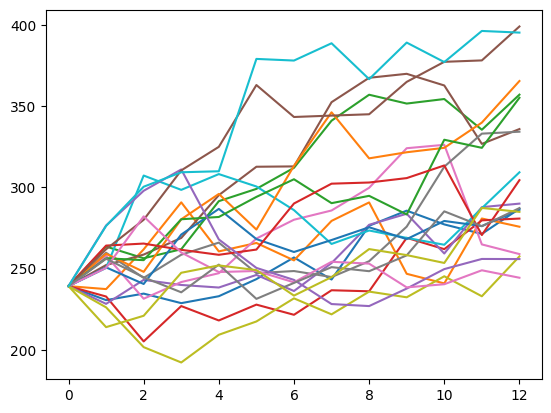

In [ ]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    return S
T = 1 
mu = mup3*12
sigma = sigmap3*np.sqrt(12)
S0 = precio.tail(1)
NS = 20
M = 12 
St = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St));


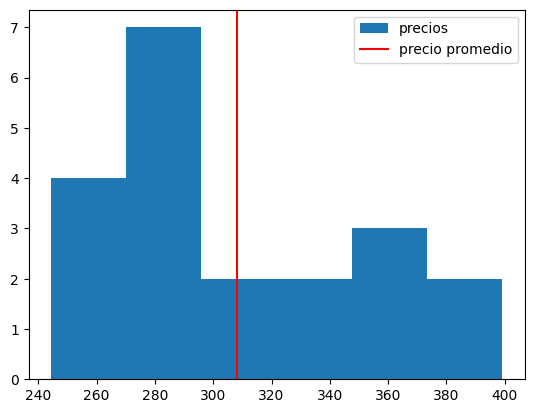

In [ ]:
plt.hist(St[:,-1], bins= "sturges", label='precios')
plt.axvline(St[:,-1].mean(), color='r', label='precio promedio')
plt.legend();

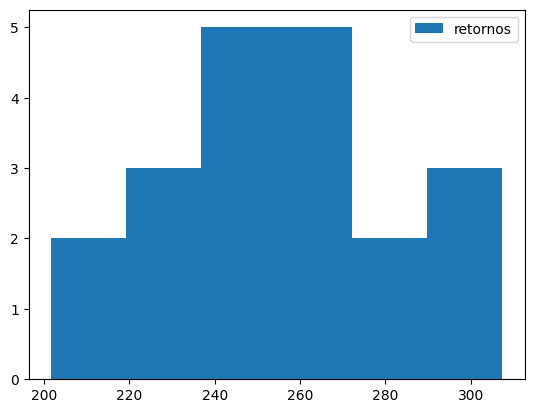

In [ ]:
plt.hist(St[:,2], bins= "sturges", label='retornos')
plt.legend();  

In [ ]:
S0*np.exp(mup3*T), St[:,-1].mean()

(Date
 2022-12-01    243.610273
 Name: Adj Close, dtype: float64,
 308.2574824727167)

d. Calcule la probabilidad de que el precio de la acción sea inferior a S0.

In [ ]:
rands = np.random.normal(mup3,sigmap3, 100);
prop = norm.cdf(S0, loc=np.mean(rands), scale=np.std(rands))
prop

array([1.])

In [ ]:
St
St[:,-1]

array([286.92197362, 275.79787629, 357.12194112, 280.82672537,
       290.02474776, 335.93717666, 258.96470686, 334.31153157,
       257.5498394 , 309.3147516 , 286.23907318, 365.51823932,
       355.20075901, 304.4697109 , 255.89015219, 399.1052043 ,
       244.38916865, 287.27959926, 284.9517528 , 395.33471959])

##4.Un tipo de proceso estocástico asociados al movimiento Browniano y que se utilizan ampliamente en finanzas son los llamados procesos de reversión a la media. Dentro de estos se encuentra el proceso Ornstein-Uhlenbeck, que es un proceso Xt que satisface: Xt+dt = Xt + (μ–Xt)dt + σ(Wt+dt − Wt)

In [ ]:
def PathsOU(X0,mu,sigma,T,NS,M):
    Z = np.random.normal(0.0,1.0,[NS,M])
    X = np.zeros([NS, M+1])
    X[:,0] = X0
    dt = T / M
    k=1
    std_dt = np.sqrt( sigma*2 /(2*k) * (1-np.exp(-2*k*dt)) )
    for t in range(0,M):
         X[:,t+1] = mu + np.exp(-k*dt)(X[:,t]-mu) + std_dt * Z[:,t]
    return X

a. Utilice el método de Monte Carlo para realizar una simulación de 10000 posibles trayectorias (NS) de este proceso considerando los siguientes valores: X0 = 1, μ = 3, σ = 0. 3, T = 5, NS = 100, dt = T/m. Presente gráficamente los resultados para las primeras 10 trayectorias del proceso.



In [ ]:
def PathsOU(X0,mu,sigma,T,NS,M):
    Z = np.random.normal(0.0,1.0,[NS,M])
    X = np.zeros([NS, M+1])
    X[:,0] = X0
    dt = T / M
    k=1
    std_dt = np.sqrt( sigma*2 /(2*k) * (1-np.exp(-2*k*dt)) )
    for t in range(0,M):
         X[:,t+1] = mu + np.exp(-k*dt)(X[:,t]-mu) + std_dt * Z[:,t]
    return X

In [ ]:
x0 = 1               
mu = 3             
sigma = 0.3         
k = 1                
T = 5                
dt = T/252           
ns = 100   

In [ ]:
y = or_uh(x0, mu, sigma, k, T, dt, ns)

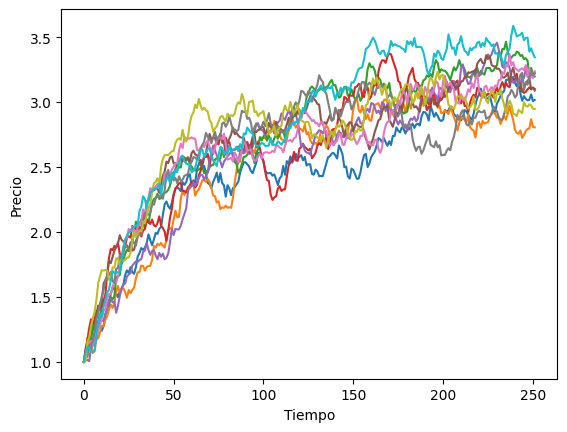

In [ ]:
plt.plot(np.transpose(y[:10]))
plt.xlabel("Tiempo")
plt.ylabel("Precio")
plt.show()

b. A partir de los observado en las simulaciones realizadas en el punto anterior, ¿qué puede concluir acerca del valor esperado y la varianza del proceso Ornstein-Uhlenbeck en el largo plazo?

El valor esperado va a ser mucho mayor, puesto que va a presentar una tendencia logaritmica positiva en la mayoria de sus caos

c. De acuerdo con la ecuación 1, ¿cuál es la distribución de probabilidad del proceso Ornstein-Uhlenbeck?

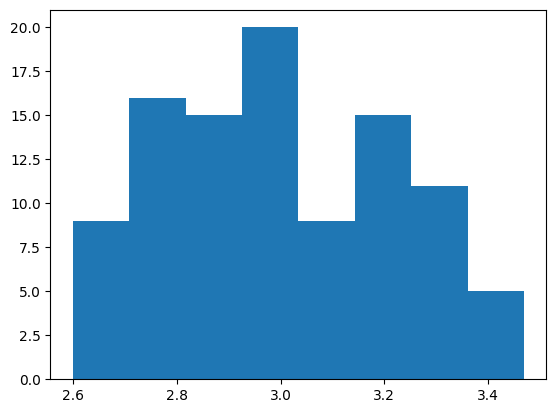

In [ ]:
p = y[:,-1]
plt.hist(p, bins='sturges')
plt.show;
     

d. El proceso Ornstein-Uhlenbeck se suelen utilizar para modelar la dinámica de la tasa
corta de interés. Por ejemplo, si rt denota el valor de la tasa corte de interés en el mercado,
esta se puede modelar como:

rt+dt = rt + (μ– rt)dt + σ(Wt+dt − Wt)

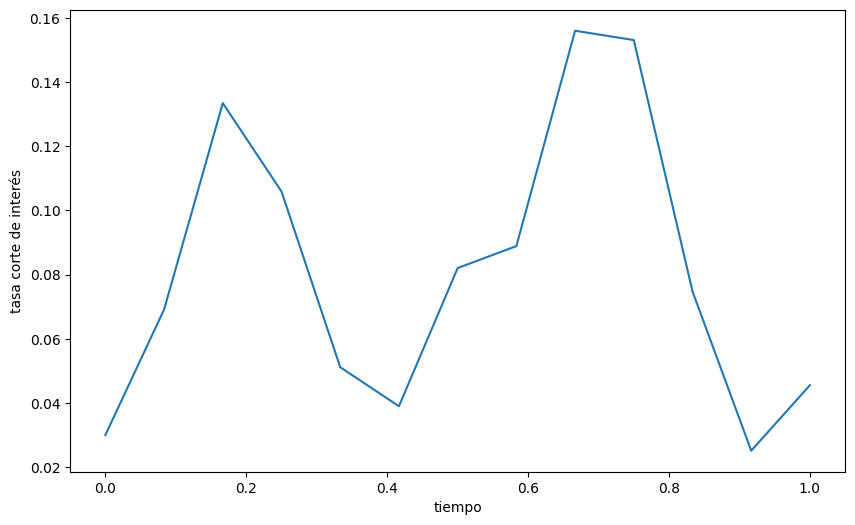

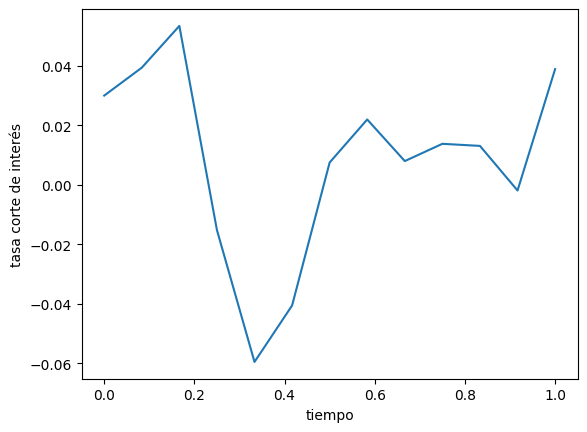

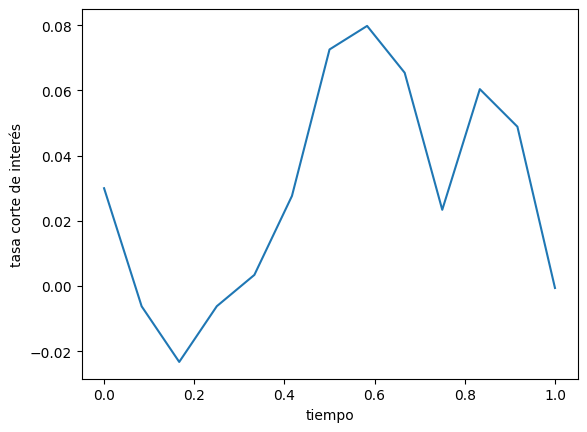

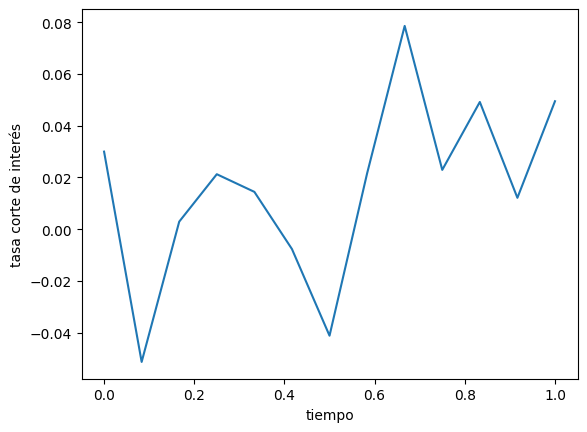

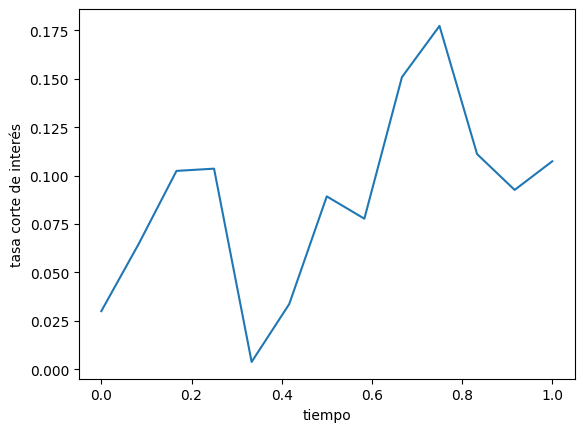

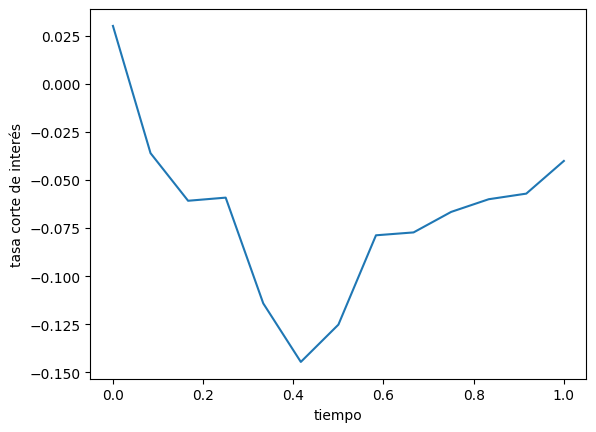

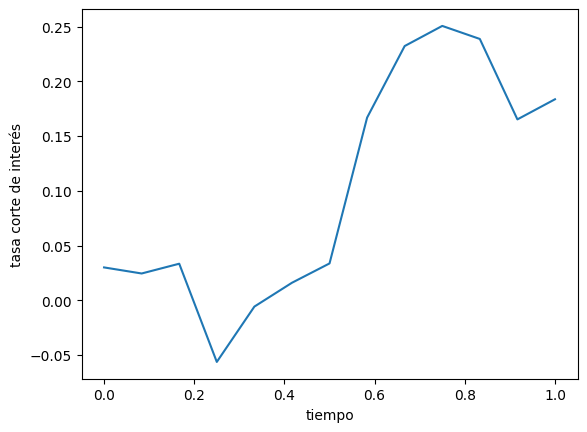

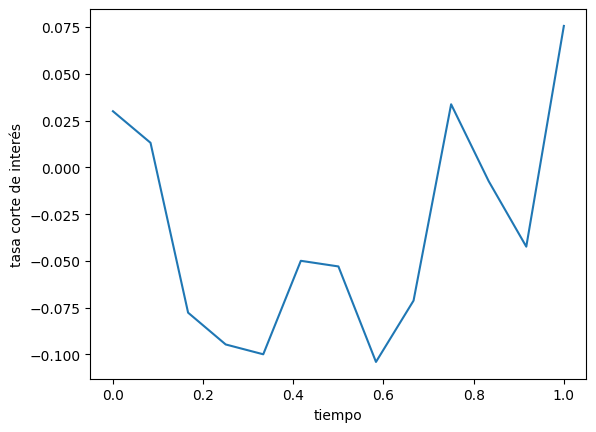

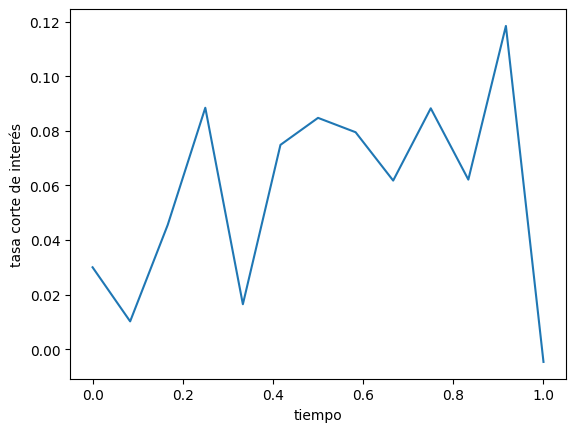

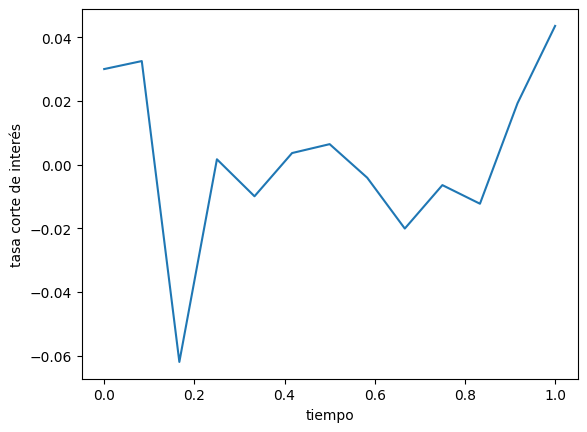

In [ ]:
r0=0.03
mu=0.05
sigma=0.15
T=1
NS=100
m=12
dt=T/M

r=np.zeros((NS, m+1))
r[:,0]=r0
for i in range(NS):
  for j in range(m):
    r[i,j+1]=r[i,j]+(mu-r[i,j])*dt+sigma*np.random.normal()*np.sqrt(dt)
plt.figure(figsize=(10,6))
for i in range(10):
  plt.plot(np.linspace(0,T,m+1),r[i,:], label=f"trayectoria{i+1}")
  plt.xlabel("tiempo")
  plt.ylabel("tasa corte de interés")
  plt.show()

## 5. Escoja tres de los siguientes activos.

i. Gold futures (GC=F) ii. Brent Oil futures (BZ=F) iii. US Treasury Bill (^IRX) iv. EURUSD currency (EURUSD=X) v. GBPUSD currency (GBPUSD=X) vi. Coffee futures (KC=F) vii. Natural gas (NG=F) viii. Cooper (HG=F)

Con la información de las series históricas para el periodo 2005-01-01 a 2022-12-31 con periodicidad mensual, construya 100 trayectorias o simulaciones para cada serie para el año 2023. Para este ejercicio tenga en cuenta que las series pueden seguir un proceso estocástico tipo MGB o de reversión a la media tipo OU. La selección del proceso debe incorporar:

a. La gráfica de las series históricas de los precios

[*********************100%***********************]  3 of 3 completed


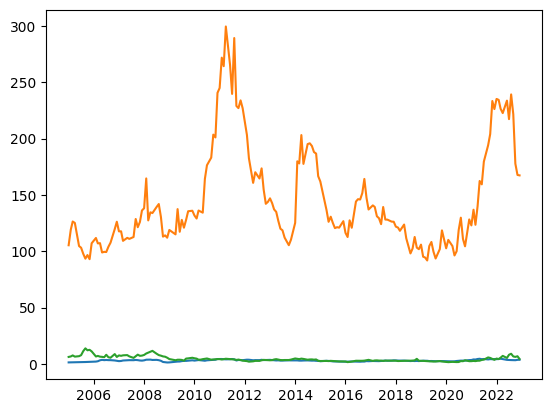

In [ ]:
p = yf.download(["KC=F","NG=F","HG=F"], start='2005-01-01', end='2022-12-31', interval='1Mo')['Adj Close'].dropna()
r = np.log(p/p.shift()).dropna()
plt.plot(p);

b. Los resultados de las pruebas de estacionariedad de Dickey-Fuller (ADF)

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
pruebadf1 = adfuller(p['KC=F'])  
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -3.329256
P-value: 0.013620
Citical values:
	1%: -3.467420
	5%: -2.877826
	10%: -2.575452


In [ ]:
pruebadf1 = adfuller(p['NG=F'])  
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -3.157328
P-value: 0.022591
Citical values:
	1%: -3.468280
	5%: -2.878202
	10%: -2.575653


In [ ]:
pruebadf1 = adfuller(p['HG=F'])  
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -3.058196
P-value: 0.029806
Citical values:
	1%: -3.466598
	5%: -2.877467
	10%: -2.575260


c. Los resultados de la simulación

In [ ]:

def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M]) #el choque con normal estandar, NS es # trayectorias y M es la particion
    S = np.zeros([NS, M+1])
    S[:,0] = S0 #S0 es el precio inicial
    dt = T / M 
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    return S

Text(0.5, 0, 'Tiempo')

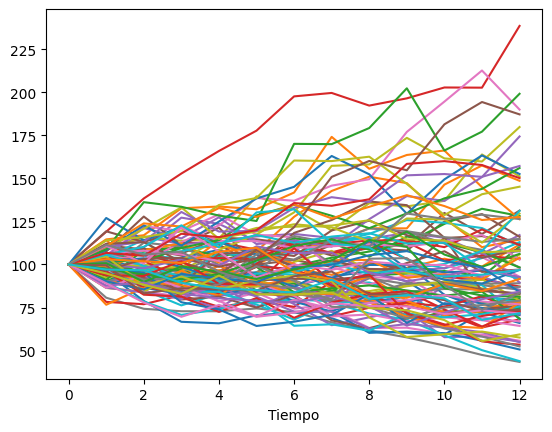

In [ ]:

# Coffee futures
T = 1 
mu = r['KC=F'].mean()
sigma = r['KC=F'].std()*np.sqrt(12)
S0 = 100
NS = 100
M = 12 
St = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St)) 
plt.xlabel("Tiempo")
     

Text(0.5, 0, 'Tiempo')

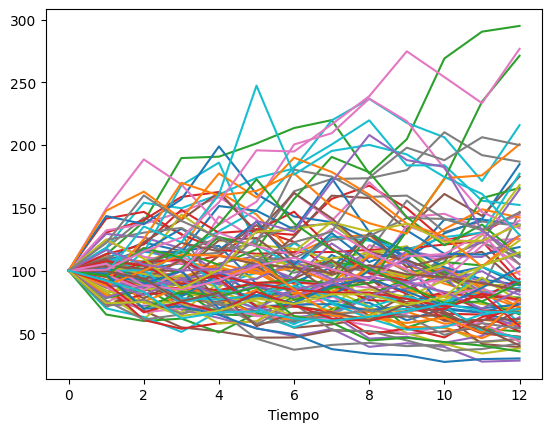

In [ ]:
# Natural gas
T = 1 
mu = r['NG=F'].mean()
sigma = r['NG=F'].std()*np.sqrt(12)
S0 = 100
NS = 100
M = 12 
St = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St)) 
plt.xlabel("Tiempo")

Text(0.5, 0, 'Tiempo')

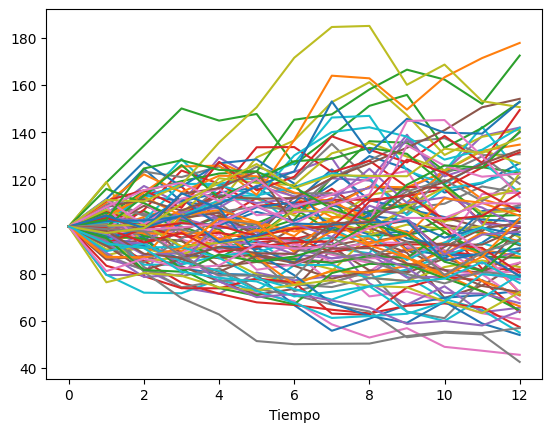

In [ ]:
# Cooper
T = 1 
mu = r['HG=F'].mean()
sigma = r['HG=F'].std()*np.sqrt(12)
S0 = 100
NS = 100
M = 12 
St = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St)) 
plt.xlabel("Tiempo")